# "What's the weather like as we approach the equator?"

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls

In [8]:
import openweathermapy.core as owm
from pprint import pprint
from urllib.error import HTTPError
from datetime import datetime

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather_data = []
city_idx = []

total_cities = len(cities)
sets = int(total_cities / 50) + int((total_cities % 50) > 0)
#print("{} {} {}".format(total_cities, sets, ((total_cities % 50) > 0)))
curr_cnt = 0

# Get current weather
for i, city in enumerate(cities):
    try:
        current_weather = owm.get_current(city, **settings)
    except HTTPError:
        pass
#        print(f"No weather found for city {i} {city}")
    else:
#        Uncomment following line to print the progress        
#        print(f"Processing Record {curr_cnt % 50} of Set {int(curr_cnt / 50)} | {city}")
        curr_cnt += 1
        weather_data.append(current_weather)

summary = ['id', 'name', "clouds.all", 'sys.country', 'dt', "main.humidity",
           'coord.lat', 'coord.lon', "main.temp_max", 'wind.speed']
data = [response(*summary) for response in weather_data]

weather_data_df = pd.DataFrame(data, columns=['City ID', 'City Name', 'Cloudiness(%)',
                                              'Country', 'Date', 'Humidity(%)', 'Lat', 'Long',
                                              'MaxTemp(in F)', 'Wind Speed(mph)'])
weather_data_df


,City ID,City Name,Cloudiness(%),Country,Date,Humidity(%),Lat,Long,MaxTemp(in F),Wind Speed(mph)
0,2069194,Jamestown,8,AU,1533439068,41,-33.21,138.60,58.59,21.43
1,2075265,Busselton,68,AU,1533439069,100,-33.64,115.35,58.86,21.32
2,3144661,Nesna,68,NO,1533439069,96,66.20,13.02,48.42,2.30
3,3423146,Ilulissat,40,GL,1533433800,75,69.22,-51.10,44.60,4.09
4,3652764,Puerto Ayora,0,EC,1533439070,100,-0.74,-90.35,70.29,10.80
5,5106834,Albany,20,US,1533437460,88,42.65,-73.75,68.00,1.74
6,2079582,Alyangula,8,AU,1533439070,84,-13.85,136.42,80.91,7.23
7,5393052,Santa Cruz,1,US,1533437760,72,36.97,-122.03,78.80,6.93
8,1611424,Chai Badan,92,TH,1533439072,100,15.20,101.13,73.62,11.14
9,408628,Nea Alikarnassos,40,GR,1533437400,69,35.33,25.17,80.60,20.80


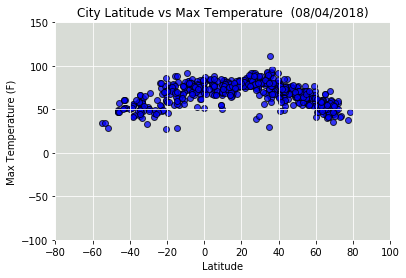

In [11]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['MaxTemp(in F)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
# Many of the following can be grouped together in a function
plt.title("City Latitude vs Max Temperature  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-100, 150])
plt.grid(color='w')
plt.savefig("Images/lat_vs_temp.png")
plt.show()

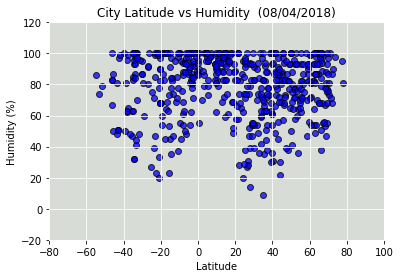

In [12]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Humidity(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Humidity  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-20, 120])
plt.grid(color='w')
plt.savefig("Images/lat_vs_humidity.png")
plt.show()

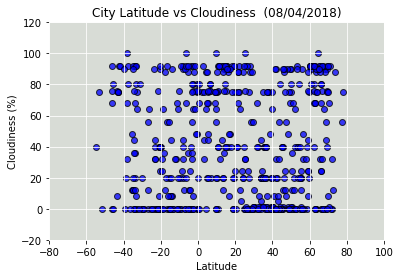

In [13]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Cloudiness  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-20, 120])
plt.grid(color='w')
plt.savefig("Images/lat_vs_cloudiness.png")
plt.show()

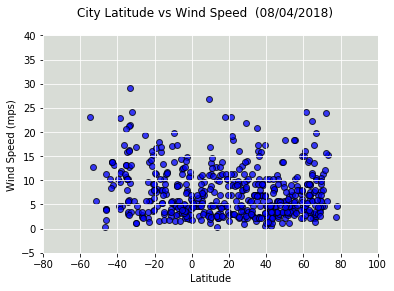

In [14]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed(mph)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
fig.suptitle("City Latitude vs Wind Speed  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-5, 40])
plt.grid(color='w')
plt.savefig("Images/lat_vs_windspeed.png")
plt.show()